# Training deep neural nets

In [1]:
# Using ReLU activation function modified
import tensorflow as tf
from tensorflow import keras
tf.__version__
import numpy as np

In [2]:
# Tesnorboard visualization of parameters and run
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


In [3]:
# Regression development using Multi-layer perceptron
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing =fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid=train_test_split(
X_train_full, y_train_full)

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test) 

In [31]:
# Building complex models using functional API
# For Image classificaton, the input shapes were in [28*28]
input_ = keras.layers.Input(shape=X_train.shape[1:])
# hidden1 = keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(input_) 
# Activation after initialisation
hidden1 = keras.layers.Dense(30, kernel_initializer="he_normal", use_bias=False)(input_)
BN1 = keras.layers.BatchNormalization()(hidden1)
Activation1=keras.layers.Activation("relu")(BN1)
hidden2 = keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(Activation1)
BN2 = keras.layers.BatchNormalization()(hidden2)
Activation2=keras.layers.Activation("relu")(BN2)
concat = keras.layers.Concatenate()([input_, Activation2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
# Keras model which inputs and outputs to use

In [7]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
# model.add(keras.layers.Dense(10, kernel_initializer="he_normal"))
# model.add(keras.layers.LeakyReLU(alpha=0.2))
# model.add(keras.layers.Dense(30, activation ="relu"))
# model.add(keras.layers.Dense(30, activation="relu"))


In [43]:
# Compiling and training/running and evaluating final results
# model.compile(loss="mean_squared_error", optimizer ="sgd")
# lr not reset on compilation, therefore we get errors
optimizer=keras.optimizers.SGD(clipvalue=1.0,lr=1e-3)
model.compile(loss="mse", optimizer=optimizer)
# model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# history =  model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_valid, y_valid))

In [44]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4441 - val_loss: 0.7994
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4374 - val_loss: 0.6306
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4304 - val_loss: 0.9306
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4369 - val_loss: 0.6499
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4359 - val_loss: 0.8013
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4344 - val_loss: 0.6839
Epoch 7/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4366 - val_loss: 0.8138
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4357 - val_loss: 0.8403
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4332 - val_loss: 0.9038
Epoch 10/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4341 - val_loss: 0.6224

In [9]:
!kill 24928

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
model

In [46]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6008


Reusing TensorBoard on port 6008 (pid 22372), started 4:27:17 ago. (Use '!kill 22372' to kill it.)

In [47]:
mse_test=model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred=model.predict(X_new)
y_pred

162/162 [==============================] - 0s 1ms/step - loss: 0.7819


array([[1.2404711 ],
       [0.98909724],
       [6.2749667 ]], dtype=float32)

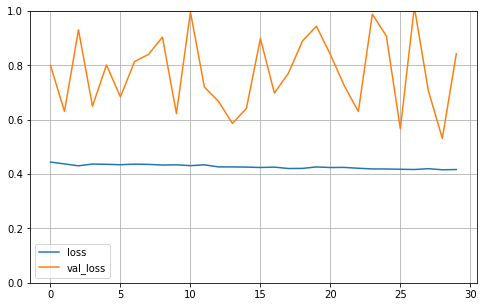

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
model.summary()
# We can see that batch normalization adds 4x30 = 120 Param to the model

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 30)           240         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 30)           120         dense_29[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 30)           0           batch_normalization_19[0][0]     
______________________________________________________________________________________

In [27]:
[(var.name, var.trainable) for var in model.layers[2].variables]

[('batch_normalization_17/gamma:0', True),
 ('batch_normalization_17/beta:0', True),
 ('batch_normalization_17/moving_mean:0', False),
 ('batch_normalization_17/moving_variance:0', False)]

In [30]:
model.layers[1].updates

[]

In [ ]:
model = keras
# Momentum- should have 0.99999 for larger datasets
# Axis -for normalisation-1 (last axis)